In [39]:
import statistics
import numpy as np
import pandas as pd
from scipy.stats import mstats
import matplotlib.pyplot as plt
% matplotlib inline

In [36]:
# Import the raw wiretapping data (sourced from https://www.kaggle.com/eff/california-wire-tapping)
# Information here: https://www.eff.org/deeplinks/2017/06/california-finally-releases-wiretap-dataset
# State-level report here: https://www.eff.org/files/2017/06/09/2016_ca_electronic_interceptions_report.pdf
raw_data = pd.read_csv('/Users/guest/Desktop/Capstone/california_wt2_export_2016.csv')

In [27]:
# Explore the variables
all_variables = list(raw_data)
print(all_variables)

for var in all_variables:
    print("\n" + var + ": " + str(raw_data[var].unique()))

raw_data.describe()

['EICOSNumber', 'DocketNumber', 'DocketYear', 'AONumber', 'ControlNumber', 'State', 'Jurisdiction', 'Judge', 'Prosecutor', 'Offense', 'Order', 'OrderApproved', 'AppDate', 'AmdDate', 'DaysOrdered', 'NumberExt', 'TotalDays', 'InterceptOne', 'InterceptTwo', 'InterceptThree', 'InterceptFour', 'LocationOne', 'LocationTwo', 'LocationThree', 'Installation', 'TermDate', 'TotalDaysUsed', 'Communications', 'Persons', 'Incriminating', 'Related Cost DN', 'Related Results DN', 'PersonnelCost', 'ResourceCost', 'Arrested', 'Granted', 'Denied', 'Pending', 'Convicted', 'Trials']

EICOSNumber: ['2016-ALA-62' '2016-ALA-63' '2016-ALA-64' '2016-ALA-65' '2016-ALA-66'
 '2016-ALA-67' '2017-CC-1' '2017-CC-3' '2017-CC-4' '2017-CC-5' '2017-CC-6'
 '2017-CC-7' '2017-CC-8' '2017-CC-9' '2017-CC-11' '2017-CC-10' '2017-CC-2'
 '2016-FR-1' '2016-FR-2' '2016-FR-3' '2016-FR-4' '2016-FR-13' '2016-FR-14'
 '2016-FR-16' '2016-FR-40' '2016-FR-21' '2016-FR-22' '2016-FR-6'
 '2016-FR-7' '2016-FR-8' '2016-FR-9' '2016-FR-10' '2016-

,DocketNumber,DocketYear,AONumber,ControlNumber,DaysOrdered,NumberExt,TotalDays,TotalDaysUsed,Communications,Persons,Incriminating,PersonnelCost,ResourceCost,Arrested,Granted,Denied,Pending,Convicted,Trials
count,0.0,569.0,0.0,0.0,569.000000,569.000000,569.000000,568.000000,564.000000,564.000000,563.000000,569.000000,569.000000,313.000000,115.0,114.0,116.000000,118.000000,114.000000
mean,NaN,2016.0,NaN,NaN,29.674868,0.460457,43.405975,40.639085,13820.391844,321.026596,2593.664298,46663.560633,5526.773286,2.479233,0.0,0.0,0.017241,0.228814,0.122807
std,NaN,0.0,NaN,NaN,2.806196,0.891431,27.039916,31.355081,40063.168991,3854.241502,7627.533929,77287.604742,14318.695896,5.503529,0.0,0.0,0.130734,1.297012,1.220332
min,NaN,2016.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,NaN,2016.0,NaN,NaN,30.000000,0.000000,30.000000,30.000000,798.000000,21.000000,124.000000,18000.000000,1700.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,NaN,2016.0,NaN,NaN,30.000000,0.000000,30.000000,30.000000,2985.000000,53.000000,470.000000,25822.000000,2000.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,NaN,2016.0,NaN,NaN,30.000000,1.000000,60.000000,51.000000,10177.000000,122.250000,1620.000000,52000.000000,5000.000000,3.000000,0.0,0.0,0.000000,0.000000,0.000000
max,NaN,2016.0,NaN,NaN,30.000000,6.000000,210.000000,330.000000,559003.000000,91116.000000,113528.000000,1000000.000000,193000.000000,58.000000,0.0,0.0,1.000000,10.000000,13.000000


In [31]:
# Define variables of note
nominal_variables = ('Jurisdiction', 'Judge', 'Prosecutor', 'Offense', 'OrderApproved', 'InterceptOne', 'InterceptTwo', 'InterceptThree', 'InterceptFour', 'LocationOne', 'LocationTwo', 'LocationThree', 'Installation')
continuous_variables = ('TotalDays', 'DaysOrdered', 'NumberExt', 'TotalDays', 'TotalDaysUsed', 'Communications', 'Incriminating', 'Persons', 'PersonnelCost', 'ResourceCost', 'Arrested')

In [40]:
# Omit outliers

#data_no_outliers = raw_data   

#for var in continuous_variables:
    
#transformed_test_data = pd.Series(mstats.winsorize(test_data, limits=[0.05, 0.05])) 
#transformed_test_data.plot()

In [33]:
# Import county population data (sourced from http://www.dof.ca.gov/Forecasting/Demographics/Estimates/E-1/)
county_pop = pd.read_csv('/Users/guest/Desktop/Capstone/CA_county_population.csv', index_col=0)

# Test county name formatting compatibility between the two datasets.
for county in raw_data['Jurisdiction'].unique():
    print(county + ": " + county_pop.loc[county, '01_16_population'])

Alameda: 1,629,233
Contra Costa: 1,126,824
Fresno: 985,079
Imperial: 186,080
Los Angeles: 10,182,961
Orange: 3,172,152
Riverside: 2,348,213
Sacramento: 1,496,619
San Bernardino: 2,135,724
San Diego: 3,286,717
San Joaquin: 735,677
San Luis Obispo: 278,480
Santa Barbara: 447,295
Santa Clara: 1,922,619
Sonoma: 502,604
Stanislaus: 541,466
Ventura: 853,893


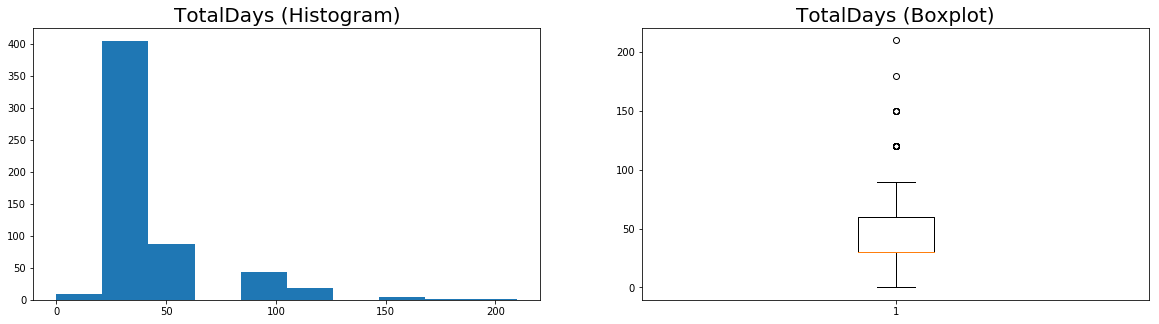

Count: 569
Sum: 24698
Mean: 43.40597539543058
Median: 30.0
Mode: 30
Min: 0
Max: 210
Standard Deviation: 27.03991636281153


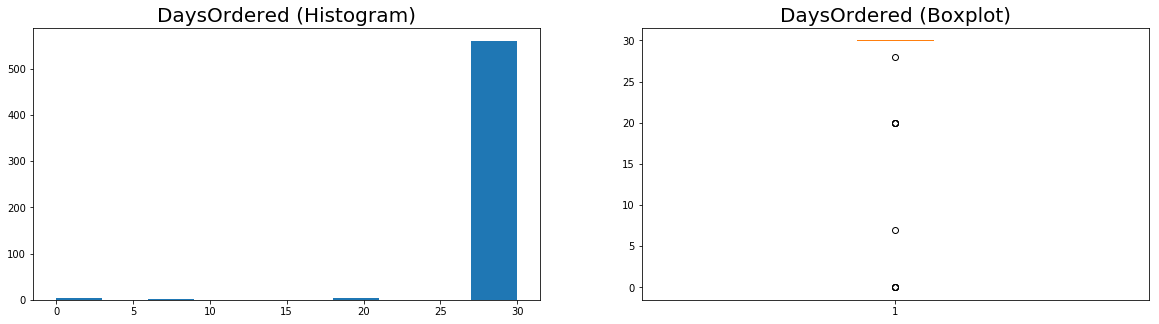

Count: 569
Sum: 16885
Mean: 29.674868189806677
Median: 30.0
Mode: 30
Min: 0
Max: 30
Standard Deviation: 2.806196179606936


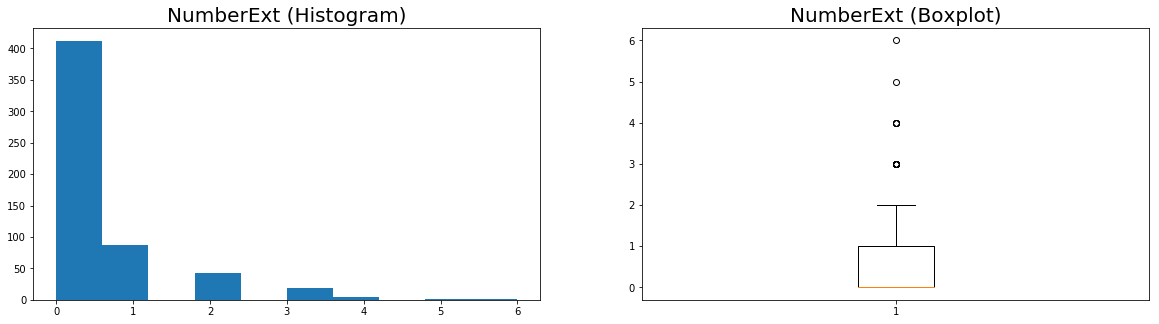

Count: 569
Sum: 262
Mean: 0.46045694200351495
Median: 0.0
Mode: 0
Min: 0
Max: 6
Standard Deviation: 0.891430525832332


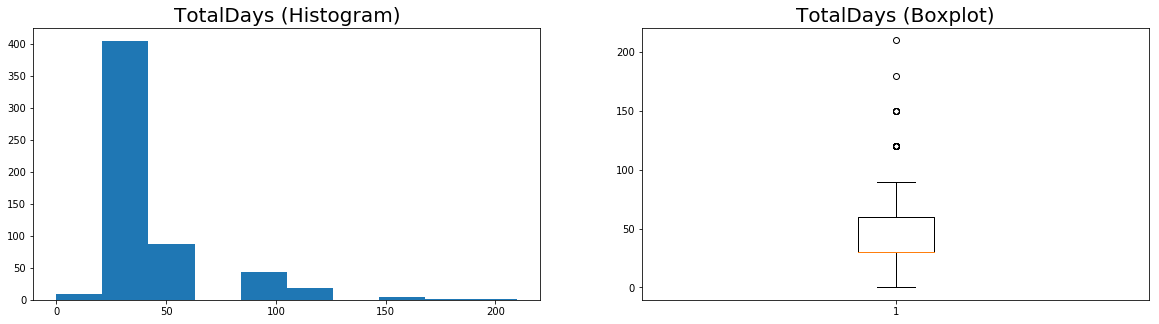

Count: 569
Sum: 24698
Mean: 43.40597539543058
Median: 30.0
Mode: 30
Min: 0
Max: 210
Standard Deviation: 27.03991636281153


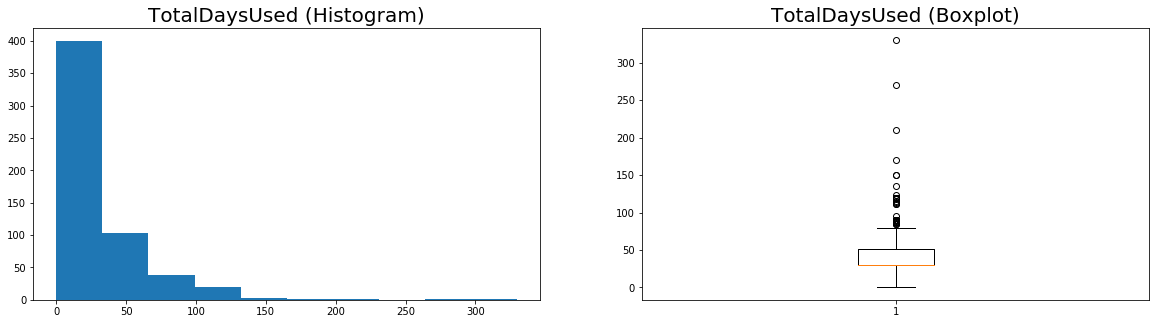

Count: 568
Sum: 23083.0
Mean: 40.639084507042256
Median: 30.0
Mode: 30.0
Min: 0.0
Max: 330.0
Standard Deviation: 31.355081170518147


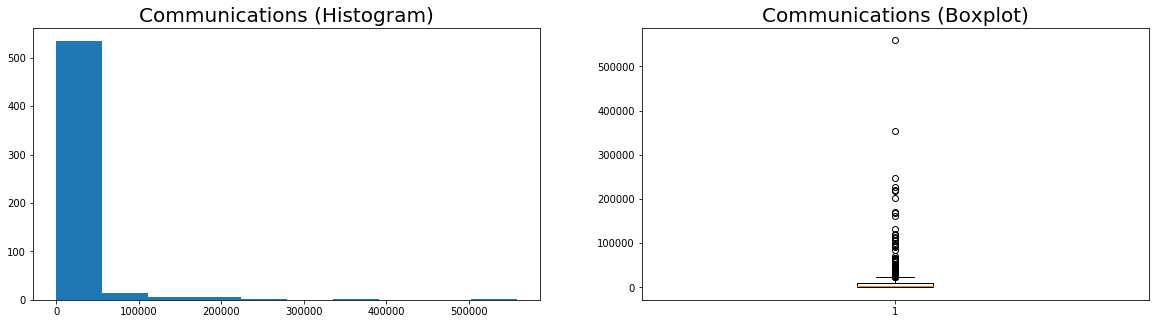

Count: 564
Sum: 7794701.0
Mean: 13820.39184397163
Median: 2985.0
Mode: 0.0
Min: 0.0
Max: 559003.0
Standard Deviation: 40063.168990530074


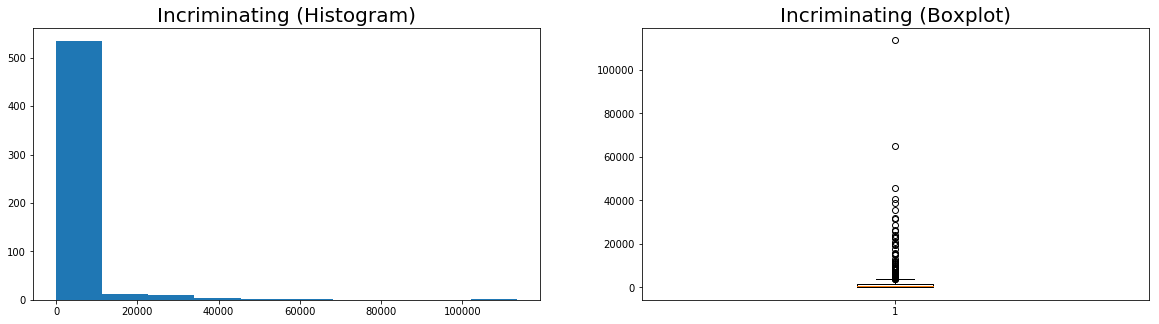

Count: 563
Sum: 1460233.0
Mean: 2593.664298401421
Median: 470.0
Mode: 0.0
Min: 0.0
Max: 113528.0
Standard Deviation: 7627.533928833254


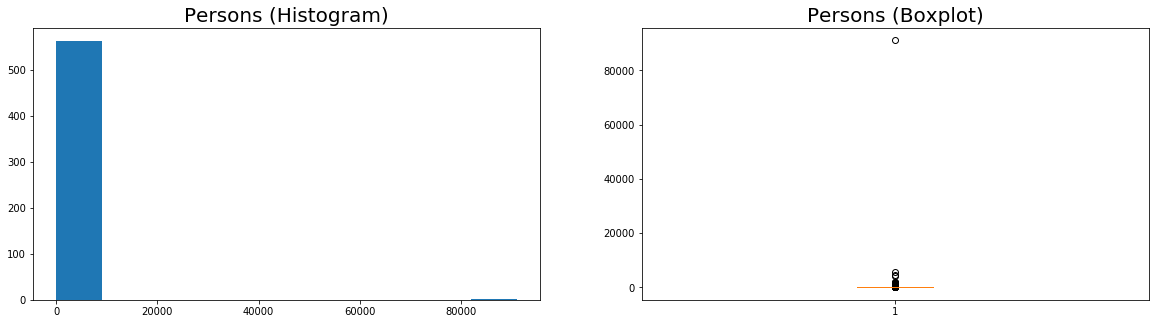

Count: 564
Sum: 181059.0
Mean: 321.02659574468083
Median: 53.0
Mode: 0.0
Min: 0.0
Max: 91116.0
Standard Deviation: 3854.2415021658767


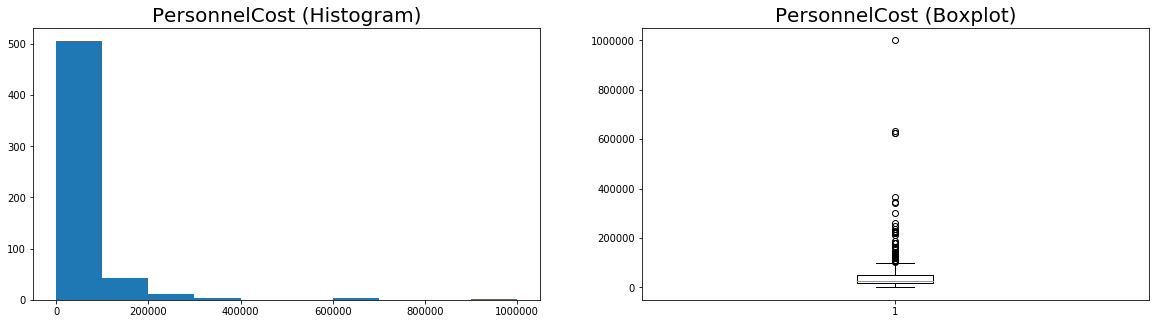

Count: 569
Sum: 26551566
Mean: 46663.560632688925
Median: 25822.0
Mode: 18000
Min: 0
Max: 1000000
Standard Deviation: 77287.60474232996


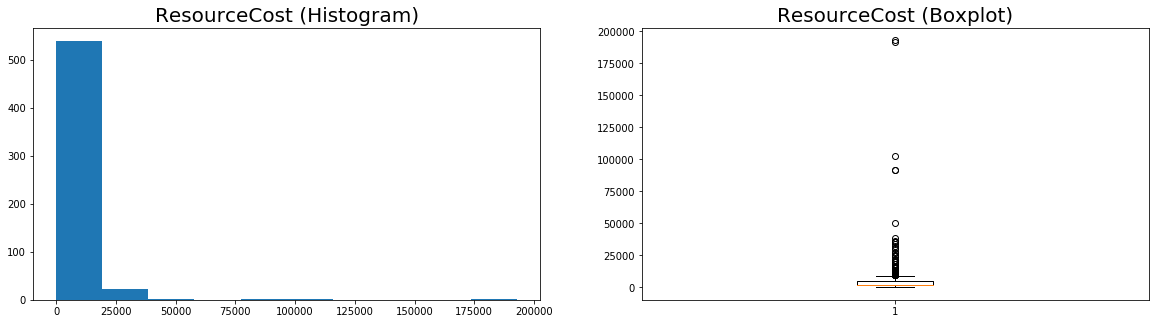

Count: 569
Sum: 3144734
Mean: 5526.773286467487
Median: 2000.0
Mode: 2000
Min: 0
Max: 193000
Standard Deviation: 14318.695895856501


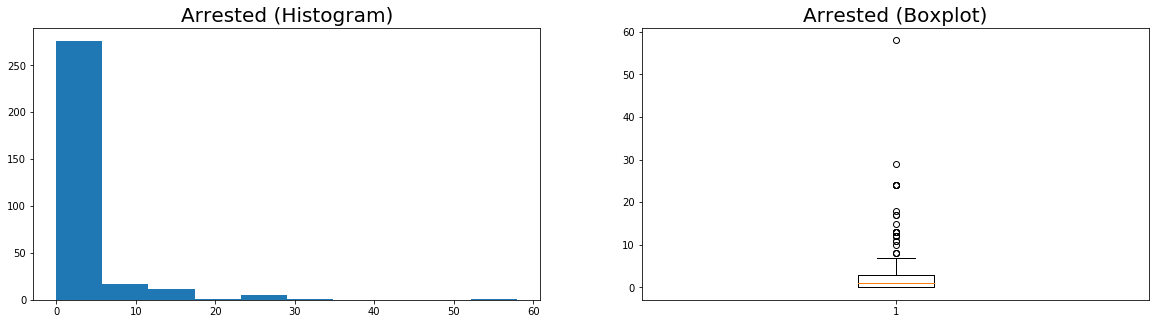

Count: 313
Sum: 776.0
Mean: 2.4792332268370605
Median: 1.0
Mode: 0.0
Min: 0.0
Max: 58.0
Standard Deviation: 5.503528884216496


In [34]:
# Explore the interval variables.

for var in continuous_variables:
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(raw_data[var].dropna())
    plt.title(var + ' (Histogram)', fontsize=20)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(raw_data[var].dropna())
    plt.title(var + ' (Boxplot)', fontsize=20)
    plt.show()
    
    print("Count: " + str(raw_data[var].count()) + "\nSum: " + str(raw_data[var].sum()) +  "\nMean: " + str(raw_data[var].mean()) + "\nMedian: " + str(raw_data[var].median()) + "\nMode: " + str(statistics.mode(raw_data[var])) + "\nMin: " + str(raw_data[var].min()) + "\nMax: " + str(raw_data[var].max()) + "\nStandard Deviation: " + str(np.std(raw_data[var], ddof=1)))

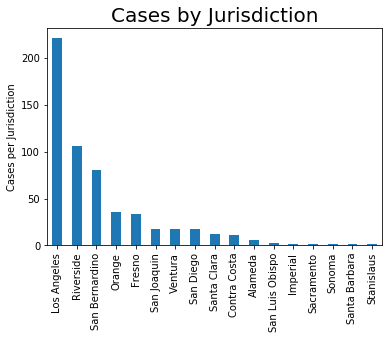

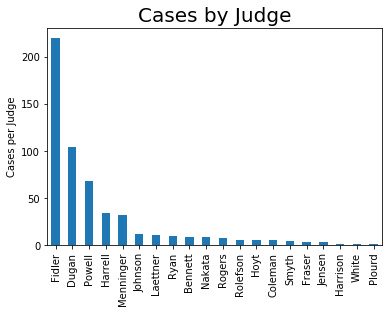

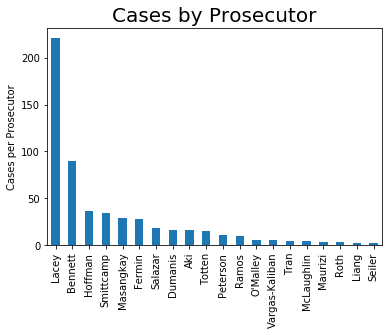

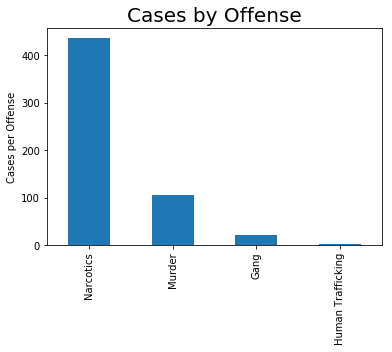

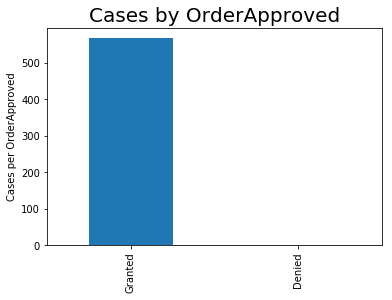

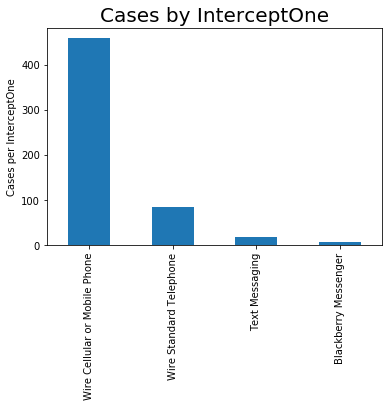

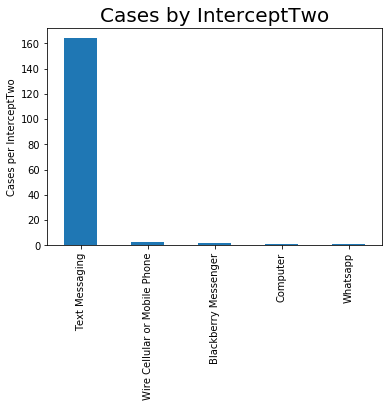

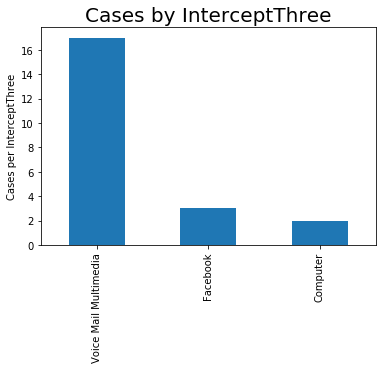

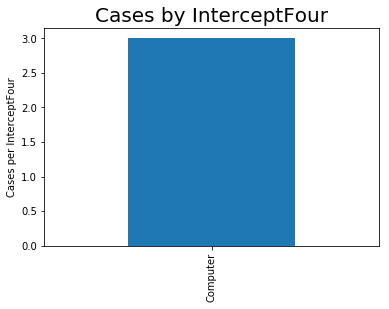

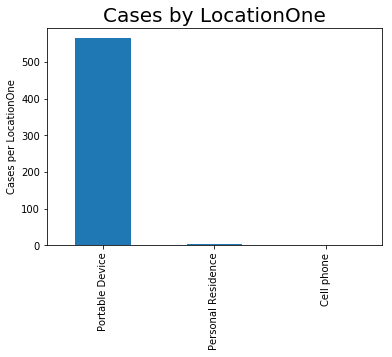

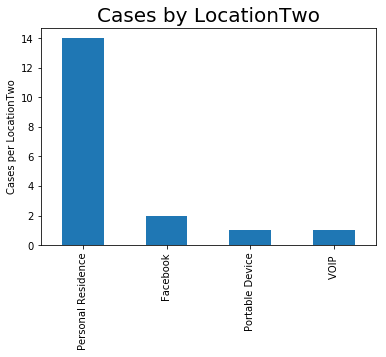

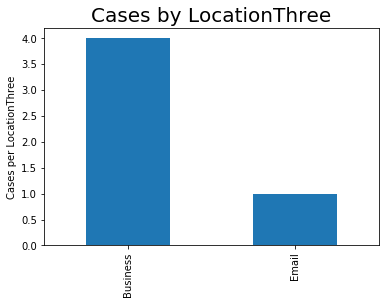

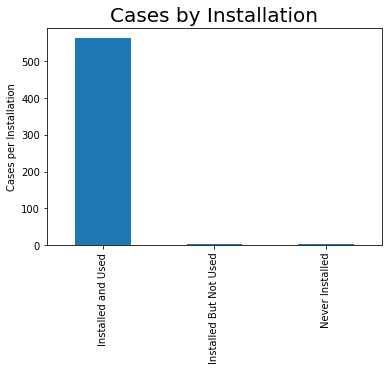

In [35]:
# Explore the nominal variables.

for var in nominal_variables:
    raw_data[var].value_counts().head(20).plot(kind='bar')
    plt.title('Cases by ' + var, fontsize=20)
    plt.ylabel('Cases per ' + str(var))
    plt.show()